In [2]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 7.2MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=cf1aa595aaff3b08ec776449df94f70ddb87b6f5dd855988fde5a597b4f0d327
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import datetime
import yfinance as yf

In [4]:
AAPL = yf.download('AAPL',period='5y', progress=False)
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-04-14,27.905001,28.097500,27.832500,28.025000,26.066298,101895600
2016-04-15,28.027500,28.075001,27.432501,27.462500,25.543112,187756000
2016-04-18,27.222500,27.237499,26.735001,26.870001,24.992023,243286000
2016-04-19,26.969999,27.000000,26.557501,26.727501,24.859484,129539600
2016-04-20,26.660000,27.022499,26.514999,26.782499,24.910643,122444000
...,...,...,...,...,...,...
2021-04-08,128.949997,130.389999,128.520004,130.360001,130.360001,88844600
2021-04-09,129.800003,133.039993,129.470001,133.000000,133.000000,106513800
2021-04-12,132.520004,132.850006,130.630005,131.240005,131.240005,91420000


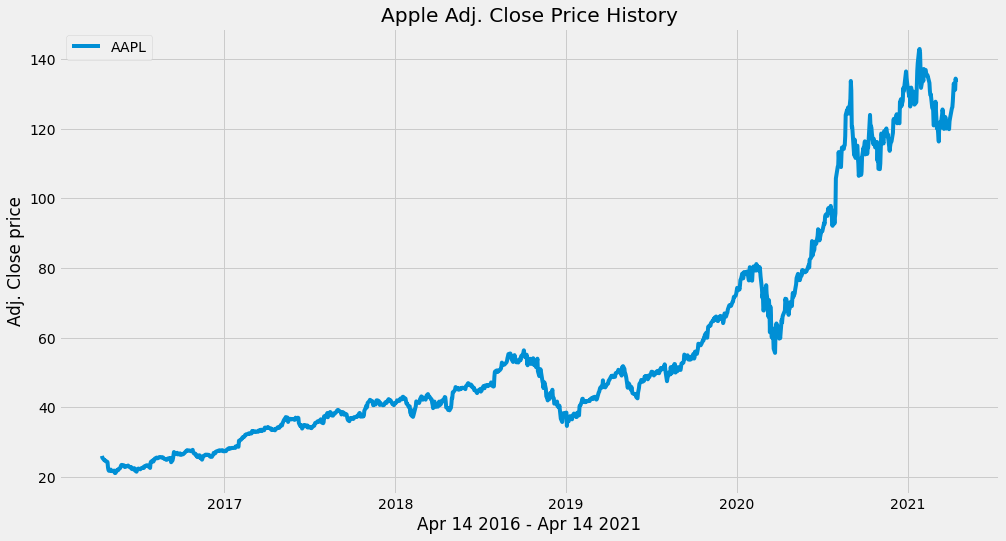

In [5]:
# plotting the data
plt.figure(figsize=(15,8))
plt.plot(AAPL['Adj Close'], label='AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Apr 14 2016 - Apr 14 2021')
plt.ylabel('Adj. Close price')
plt.legend(loc='best')
plt.show()

In [6]:
# simple moving average with window = 30 days
ma30 = pd.DataFrame()
ma30['Adj Close'] = AAPL['Adj Close'].rolling(window=30).mean()

In [7]:
# simple moving average with window = 100 days
ma100 = pd.DataFrame()
ma100['Adj Close'] = AAPL['Adj Close'].rolling(window=100).mean()

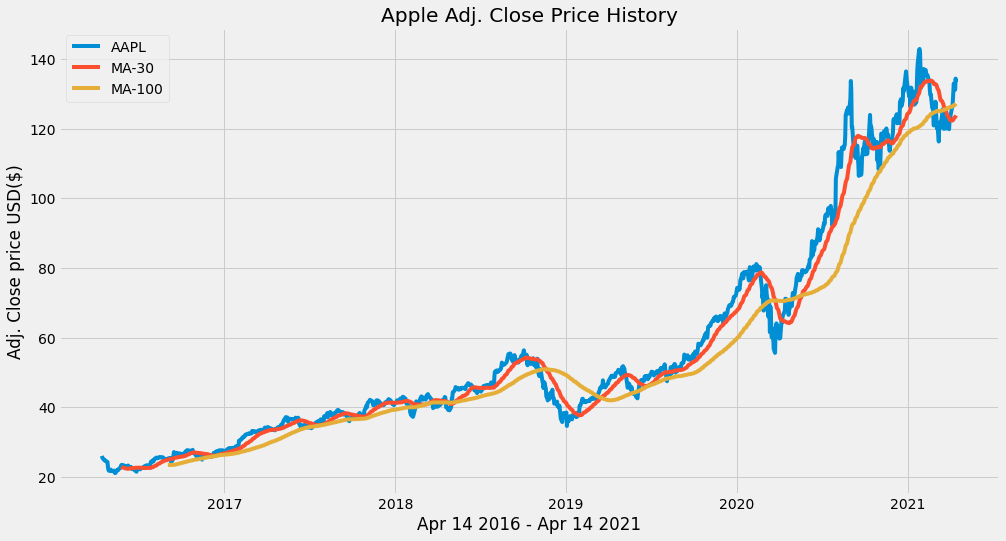

In [8]:
# plotting the data
plt.figure(figsize=(15,8))
plt.plot(AAPL['Adj Close'], label='AAPL')
plt.plot(ma30['Adj Close'], label='MA-30')
plt.plot(ma100['Adj Close'], label='MA-100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Apr 14 2016 - Apr 14 2021')
plt.ylabel('Adj. Close price USD($)')
plt.legend(loc='best')
plt.show()

In [9]:
# creating a new dataframe
df = pd.DataFrame()
df['AAPL'] = AAPL['Adj Close']
df['MA30'] = ma30['Adj Close']
df['MA100'] = ma100['Adj Close']
df

,AAPL,MA30,MA100
Date,,,
2016-04-14,26.066298,NaN,NaN
2016-04-15,25.543112,NaN,NaN
2016-04-18,24.992023,NaN,NaN
2016-04-19,24.859484,NaN,NaN
2016-04-20,24.910643,NaN,NaN
...,...,...,...
2021-04-08,130.360001,122.622000,126.655955
2021-04-09,133.000000,123.022333,126.795634
2021-04-12,131.240005,123.355000,126.917213


In [15]:
# buy or sell function

def MA_crossover(data):
  buy_signal = []
  sell_signal = []
  flag = -1 # when the two MA's cross each other

  for i in range(len(data)):
    if data['MA30'][i] > data['MA100'][i]:
      if flag != 1:
        buy_signal.append(data['AAPL'][i])
        sell_signal.append(np.nan)
        flag = 1
      else:
        buy_signal.append(np.nan)
        sell_signal.append(np.nan)
    elif data['MA30'][i] < data['MA100'][i]:
      if flag != 0:
        buy_signal.append(np.nan)
        sell_signal.append(data['AAPL'][i])
        flag = 0
      else:
        buy_signal.append(np.nan)
        sell_signal.append(np.nan)
    else:
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)
  return (buy_signal, sell_signal)

In [16]:
buy_or_sell = MA_crossover(df)
df['buy_signal_price'] = buy_or_sell[0]
df['sell_signal_price'] = buy_or_sell[1]

In [17]:
df

,AAPL,MA30,MA100,buy_signal_price,sell_signal_price
Date,,,,,
2016-04-14,26.066298,NaN,NaN,NaN,NaN
2016-04-15,25.543112,NaN,NaN,NaN,NaN
2016-04-18,24.992023,NaN,NaN,NaN,NaN
2016-04-19,24.859484,NaN,NaN,NaN,NaN
2016-04-20,24.910643,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-04-08,130.360001,122.622000,126.655955,NaN,NaN
2021-04-09,133.000000,123.022333,126.795634,NaN,NaN
2021-04-12,131.240005,123.355000,126.917213,NaN,NaN


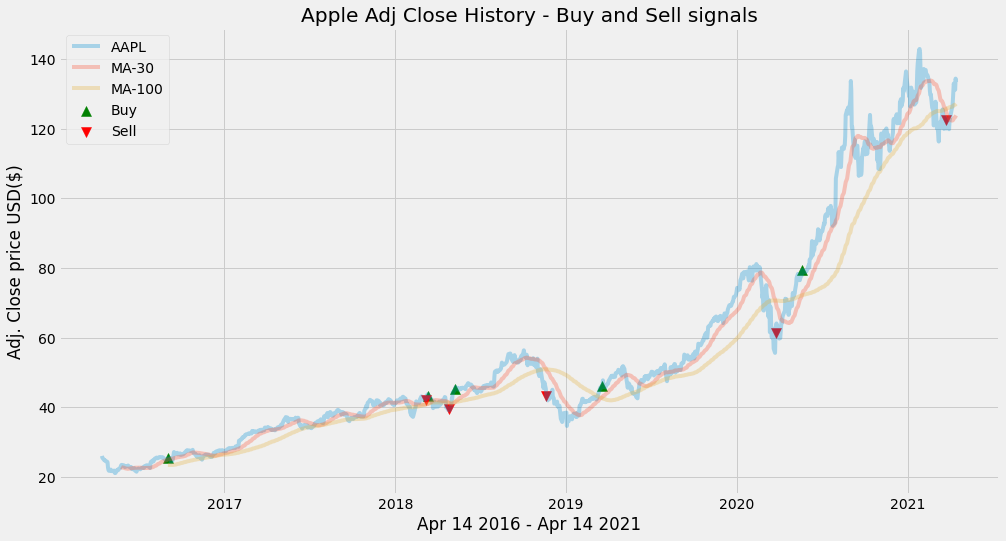

In [26]:
# plotting the data
plt.figure(figsize=(15,8))
plt.plot(df['AAPL'], label='AAPL', alpha=0.30)
plt.plot(df['MA30'], label='MA-30', alpha=0.30)
plt.plot(df['MA100'], label='MA-100', alpha=0.30)
plt.scatter(df.index, df['buy_signal_price'], label='Buy', marker='^', color='green', s=100)
plt.scatter(df.index, df['sell_signal_price'], label='Sell', marker='v', color='red', s=100)
plt.title('Apple Adj Close History - Buy and Sell signals')
plt.xlabel('Apr 14 2016 - Apr 14 2021')
plt.ylabel('Adj. Close price USD($)')
plt.legend(loc='best')
plt.show()